In [2]:
%cd /proj/fastsom

/proj/fastsom


# SOM Training on RGB Colors Dataset


In [3]:
import torch
import random
import matplotlib
import numpy as np
import pandas as pd

from fastsom import *
from fastai.tabular.all import *

### Creating the DataBunch

In [4]:
def colors():
    # Set color dataset
    colors = np.empty((0,3), float)
    colors = np.append(colors, np.array([[0, 0, 0]]), axis=0)
    colors = np.append(colors, np.array([[1, 1, 1]]), axis=0)
    for i in range(20):
        colors = np.append(colors, np.array([[0, 0, random.random()]]), axis=0)
        colors = np.append(colors, np.array([[0, random.random(), 0]]), axis=0)
        colors = np.append(colors, np.array([[random.random(), 0, 0]]), axis=0)
        colors = np.append(colors, np.array([[1, 1, random.random()]]), axis=0)
        colors = np.append(colors, np.array([[1, random.random(), 1]]), axis=0)
        colors = np.append(colors, np.array([[random.random(), 1, 1]]), axis=0)
        colors = np.append(colors, np.array([[0, random.random(), random.random()]]), axis=0)
        colors = np.append(colors, np.array([[random.random(), random.random(), 0]]), axis=0)
        colors = np.append(colors, np.array([[1, random.random(), random.random()]]), axis=0)
        colors = np.append(colors, np.array([[random.random(), random.random(), 1]]), axis=0)
        colors = np.append(colors, np.array([[random.random(), random.random(), random.random()]]), axis=0)
    x = colors
    y = None
    labels = ['Red', 'Green', 'Blue']
    
    return x, y, labels

In [5]:
x, y, labels = colors()

Let's create a `DataFrame` which we'll convert into a `TabularDataBunch`:

In [6]:
df = pd.DataFrame(x, columns=labels)
df.head()

,Red,Green,Blue
0,0.000000,0.000000,0.00000
1,1.000000,1.000000,1.00000
2,0.000000,0.000000,0.10071
3,0.000000,0.481061,0.00000
4,0.297527,0.000000,0.00000


In [7]:
dls = TabularDataLoaders.from_df(df, cat_names=[], cont_names=labels, procs=[Normalize])

### Creating the Learner

In [8]:
learn = SomLearner(dls, size=(10, 10), visualize=['weights'])

### Training the model

<IPython.core.display.Javascript object>


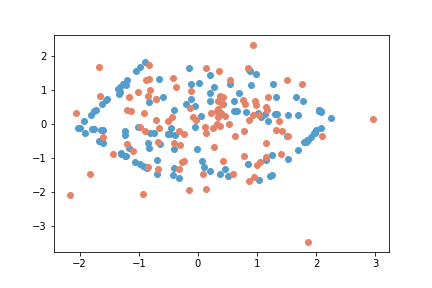

epoch,train_loss,valid_loss,time
0,0.527876,0.594398,00:00
1,0.588318,0.843232,00:00
2,0.699907,0.960217,00:00
3,0.772397,0.990017,00:00
4,0.825886,0.986002,00:00
5,0.857586,0.986481,00:00
6,0.877818,0.977851,00:00
7,0.896072,0.971572,00:00
8,0.905084,0.952960,00:00
9,0.912846,0.936710,00:00


In [9]:
%matplotlib notebook
learn.fit(40)

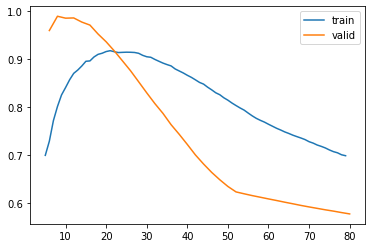

In [10]:
%matplotlib inline
learn.recorder.plot_loss()

### Interpretation

The `SomInterpretation` class provides visualization utilities, to better understand the output of the training process.

In [11]:
interp = SomInterpretation.from_learner(learn)

`show_hitmap` displays a heatmap of hit counts for each map position:

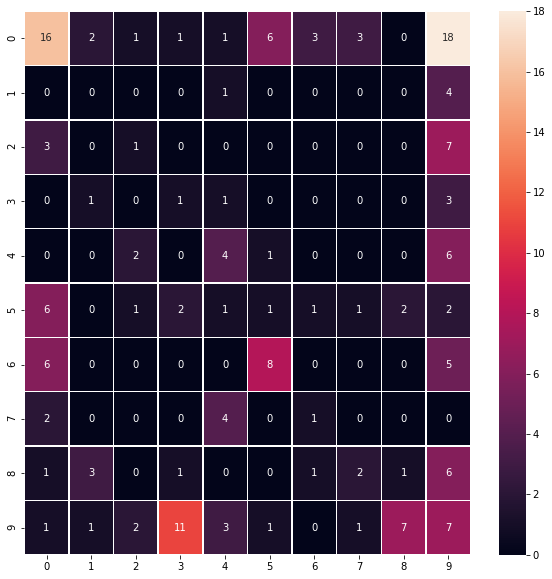

In [12]:
%matplotlib inline
interp.show_hitmap()

`show_feature_heatmaps` shows the per-feature value distribution over the SOM codebooks:

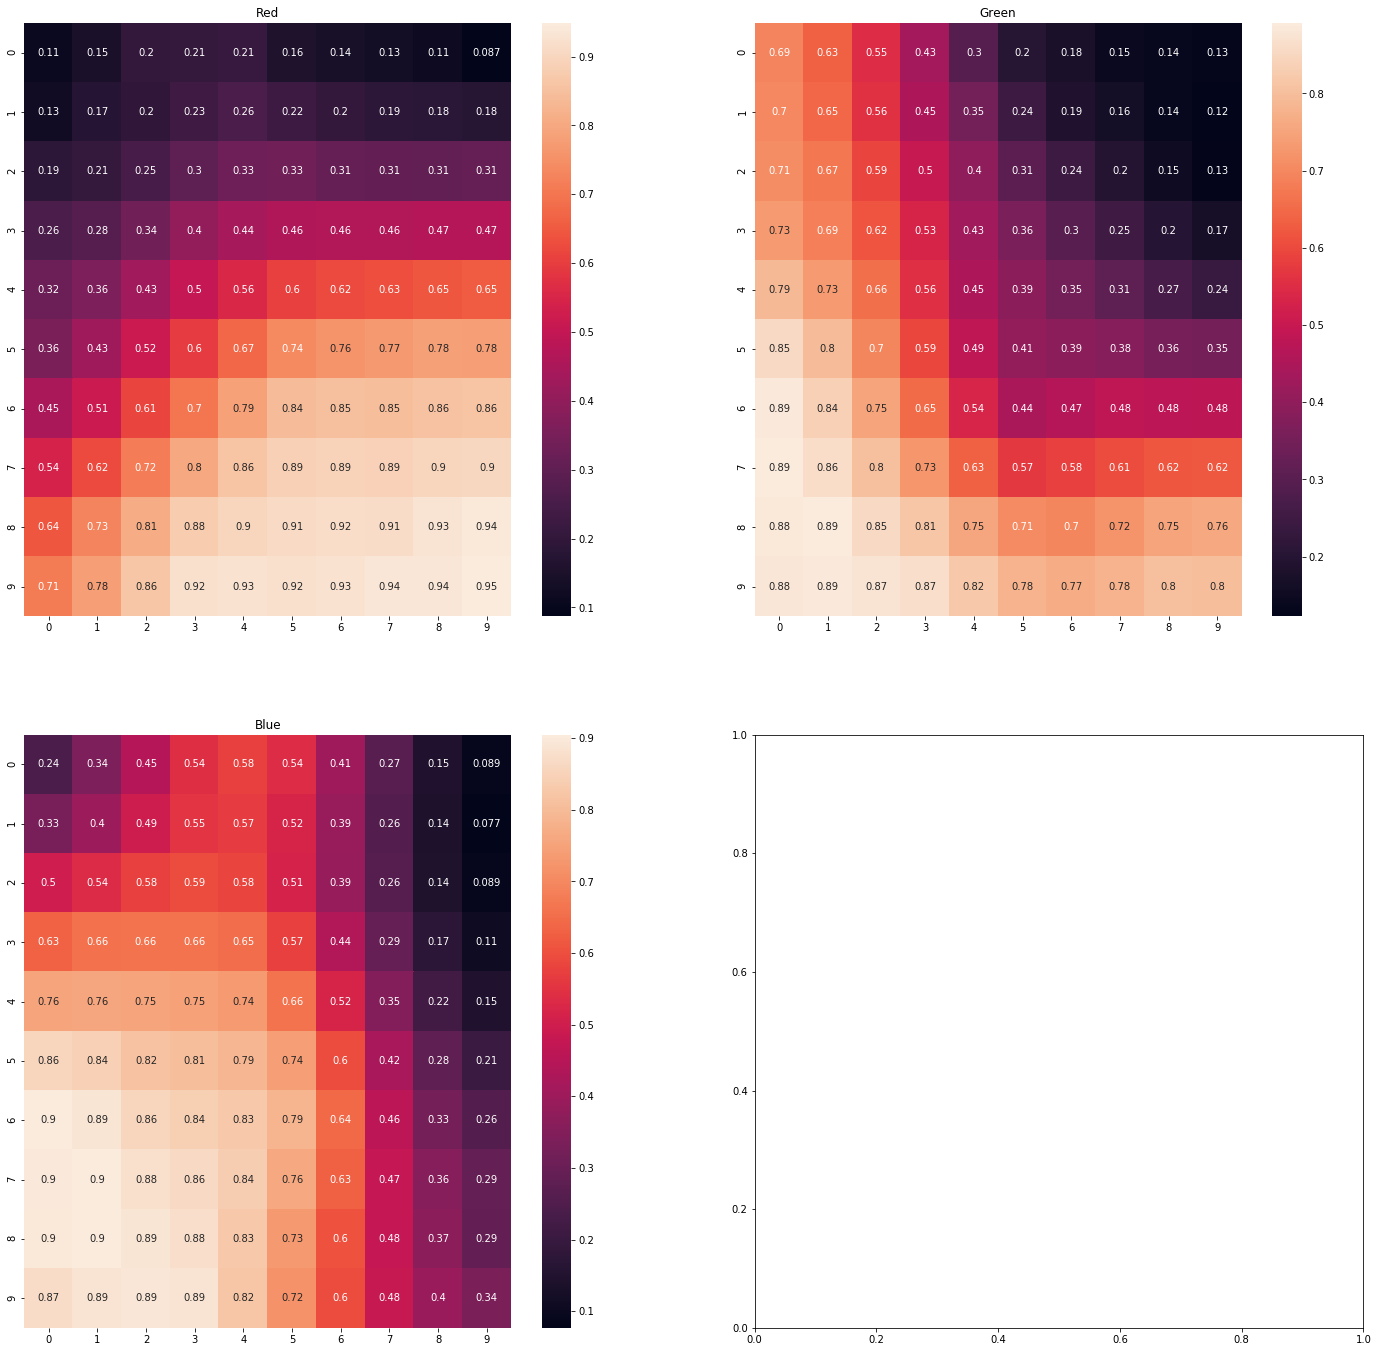

In [13]:
%matplotlib inline
interp.show_feature_heatmaps()

`show_weights` displays a three-dimensional PCA of the SOM codebook as an RGB image:

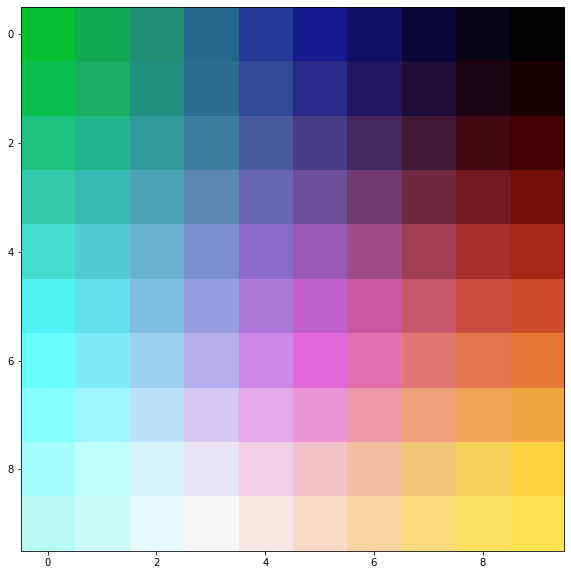

In [14]:
%matplotlib inline
interp.show_weights()